In [1]:
from dotenv import load_dotenv

load_dotenv()

True

## Summarize messages

In [2]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver
from langchain.agents.middleware import SummarizationMiddleware

agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),
    middleware=[
        SummarizationMiddleware(
            model="gpt-4o-mini",
            trigger=("tokens", 100),
            keep=("messages", 1)
        )
    ]
)

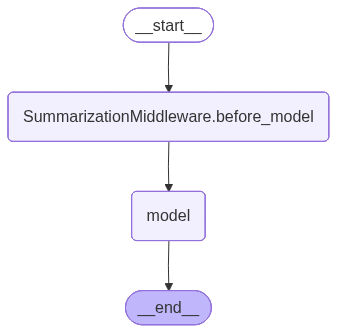

In [8]:
agent

In [3]:
from langchain.messages import HumanMessage, AIMessage
from pprint import pprint

response = agent.invoke(
    {"messages": [
        HumanMessage(content="What is the capital of the Moon?"),
        AIMessage(content="The capital of the Moon is Lunapolis."),
        HumanMessage(content="What is the weather in Lunapolis?"),
        AIMessage(content="Skies are clear, with a high of 120C and a low of -100C."),
        HumanMessage(content="How many cheese miners live in Lunapolis?"),
        AIMessage(content="There are 100,000 cheese miners living in Lunapolis."),
        HumanMessage(content="Do you think the cheese miners union will strike?"),
        AIMessage(content="Yes, because they are unhappy with the new president."),
        HumanMessage(content="If you were a Lunapolis's new president how would you respond to the cheese miners union?")
    ]},
    {"configurable": {"thread_id": "1"}}
)

pprint(response)

{'messages': [HumanMessage(content='Here is a summary of the conversation to date:\n\nThe capital of the Moon is Lunapolis. The weather in Lunapolis features clear skies, with a high of 120°C and a low of -100°C. There are 100,000 cheese miners living in Lunapolis, and it is anticipated that the cheese miners union will strike due to their dissatisfaction with the new president.', additional_kwargs={}, response_metadata={}, id='0c21b9a4-0c4e-4097-bbe6-48be001062ee'),
              HumanMessage(content="If you were a Lunapolis's new president how would you respond to the cheese miners union?", additional_kwargs={}, response_metadata={}, id='c7d0a165-40c1-4faf-88cc-b912ec035dc9'),
              AIMessage(content='If I were Lunapolis’s new president, I’d aim for a constructive, non-confrontational approach that protects essential cheese production while addressing the union’s core concerns. Here’s a practical plan you could use:\n\nKey principles\n- Acknowledge grievances and treat miners

In [5]:
pprint(response["messages"][0].content)

('Here is a summary of the conversation to date:\n'
 '\n'
 'The capital of the Moon is Lunapolis. The weather in Lunapolis features '
 'clear skies, with a high of 120°C and a low of -100°C. There are 100,000 '
 'cheese miners living in Lunapolis, and it is anticipated that the cheese '
 'miners union will strike due to their dissatisfaction with the new '
 'president.')


https://smith.langchain.com/public/9d10ce70-ff4f-426b-a109-4d28d18caeb6/r

In [6]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="Yea but what if the populace is confrontational?")
    ]},
    {"configurable": {"thread_id": "1"}}
)

pprint(response)

{'messages': [HumanMessage(content='Here is a summary of the conversation to date:\n\nThe capital of the Moon is Lunapolis, which has a weather range of clear skies, with a high of 120°C and a low of -100°C. Lunapolis is home to 100,000 cheese miners, and there is concern about an impending strike by the cheese miners union due to dissatisfaction with the new president. \n\nIf I were Lunapolis’s new president, I would adopt a constructive, non-confrontational strategy to address the union’s concerns while ensuring cheese production continues. Key actions would include:\n\n- Acknowledging grievances and ensuring respect for the miners.\n- Prioritizing safety, fair pay, and financial sustainability.\n- Employing transparent negotiations with the involvement of a neutral mediator.\n- Holding meetings with union leaders to understand their demands.\n- Forming a joint Labor-Management Negotiation Committee with clear timelines.\n\nProposed negotiation strategies include interest-based barga

In [7]:
pprint(response["messages"][0].content)

('Here is a summary of the conversation to date:\n'
 '\n'
 'The capital of the Moon is Lunapolis, which has a weather range of clear '
 'skies, with a high of 120°C and a low of -100°C. Lunapolis is home to '
 '100,000 cheese miners, and there is concern about an impending strike by the '
 'cheese miners union due to dissatisfaction with the new president. \n'
 '\n'
 'If I were Lunapolis’s new president, I would adopt a constructive, '
 'non-confrontational strategy to address the union’s concerns while ensuring '
 'cheese production continues. Key actions would include:\n'
 '\n'
 '- Acknowledging grievances and ensuring respect for the miners.\n'
 '- Prioritizing safety, fair pay, and financial sustainability.\n'
 '- Employing transparent negotiations with the involvement of a neutral '
 'mediator.\n'
 '- Holding meetings with union leaders to understand their demands.\n'
 '- Forming a joint Labor-Management Negotiation Committee with clear '
 'timelines.\n'
 '\n'
 'Proposed negotiati

https://smith.langchain.com/public/d9a30984-b596-4ab3-a7ef-5e8bf0b7a0ab/r

## Trim/delete messages

In [9]:
from typing import Any
from langchain.agents import AgentState
from langchain.messages import RemoveMessage
from langgraph.runtime import Runtime
from langchain.agents.middleware import before_agent
from langchain.messages import ToolMessage

@before_agent
def trim_messages(state: AgentState, runtime: Runtime) -> dict[str, Any] | None:
    """
    Remove all the tool messages from the state
    """

    messages = state["messages"]

    tool_messages = [m for m in messages if isinstance(m, ToolMessage)]

    return {"messages": [RemoveMessage(id=m.id) for m in tool_messages]}

In [10]:
agent = create_agent(
    model="gpt-5-nano",
    checkpointer=InMemorySaver(),
    middleware=[trim_messages],
)

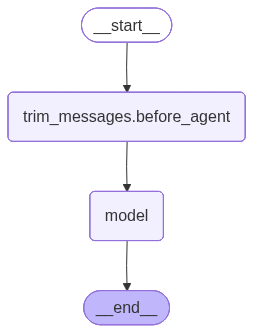

In [11]:
agent

In [12]:
response = agent.invoke(
    {"messages": [
        HumanMessage(content="My device won't turn on. What should I do?"),
        ToolMessage(content="blorp-x7 initiating diagnostic ping...", tool_call_id="1"),
        AIMessage(content="Is the device plugged in and turned on?"),
        HumanMessage(content="Yes, it's plugged in and turned on."),
        ToolMessage(content="temp=42C voltage=2.9v ... greeble complete.", tool_call_id="2"),
        AIMessage(content="Is the device showing any lights or indicators?"),
        HumanMessage(content="Yes, it has a red light on.")
    ]},
    {"configurable": {"thread_id": "1"}}
)

pprint(response)

{'messages': [HumanMessage(content="My device won't turn on. What should I do?", additional_kwargs={}, response_metadata={}, id='568d0a95-82d3-41e1-98cc-6f345f3363a1'),
              AIMessage(content='Is the device plugged in and turned on?', additional_kwargs={}, response_metadata={}, id='72982c68-9758-4820-b38f-ca155f9f57bf'),
              HumanMessage(content="Yes, it's plugged in and turned on.", additional_kwargs={}, response_metadata={}, id='b9483be2-f187-468a-932c-4f73e7b116d4'),
              AIMessage(content='Is the device showing any lights or indicators?', additional_kwargs={}, response_metadata={}, id='b2b0149a-40cf-4538-8759-c992c1498af6'),
              HumanMessage(content='Yes, it has a red light on.', additional_kwargs={}, response_metadata={}, id='3b3d45e1-bfc4-442c-a314-527b7fbf66e5'),
              AIMessage(content='A red light can mean different things depending on the device. Since I don’t know the exact model, here are general steps you can try. If you can sh

https://smith.langchain.com/public/b655df2f-2358-4e35-8b6b-dbe29e26dd87/r